In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = np.dtype([('instance_no', int),
               ('exp_no', int),
               ('method', int), # 1 = white box, 2 = euclidean_PCA, 3 = hog, 4 = euclidean_PCA category, 5 = hog category, 6 = ais
               ('pca_n', int),
               ('percentage_of_data', float),
               ('percentile', float),
               ('mc_euclidean_no_batches', int), # stuff
               ('mc_hog_no_batches', int), # stuff
               ('sigma_ais', float),
               ('mc_attack_log', float),
               ('mc_attack_eps', float),
               ('mc_attack_frac', float), 
               ('mc_attack_log_50', float), 
               ('mc_attack_eps_50', float),
               ('mc_attack_frac_50', float),
               ('white_box_50', float),
               ('white_box_11', float),
               ('ais_50', float),
               ('ais_acc_rate_50', float),
              ])

In [22]:
data = pd.DataFrame(np.loadtxt('WB_Attack.csv', dtype=dt))

# ais sign correction
data.loc[data.method == 6,('ais_50')] = 1-data[data.method == 6].ais_50

data = data.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
data = data.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)
data = data.assign(mem_inf_adv_wb = lambda x: (x.white_box_50-0.5)*2)
data = data.assign(mem_inf_adv_ais = lambda x: (x.ais_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

data = data.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
data = data.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))
data = data.assign(set_accuracy_wb = lambda x: convert_to_set_prob(x.mem_inf_adv_wb))
data = data.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.mem_inf_adv_ais))

data = data.assign(set_mem_inf_adv_mc_log = lambda x: 2*x.set_accuracy_mc_log-1)
data = data.assign(set_mem_inf_adv_mc_ones = lambda x: 2*x.set_accuracy_mc_ones-1)
data = data.assign(set_mem_inf_adv_wb = lambda x: 2*x.set_accuracy_wb-1)
data = data.assign(set_mem_inf_adv_ais = lambda x: 2*x.set_accuracy_ais-1)

white_box = data[data.method == 1]
pca = data[data.method == 2]
hog = data[data.method == 3]
pca_cat = data[data.method == 4]
hog_cat = data[data.method == 5]
ais = data[data.method == 6]



# White Box

In [23]:
len(white_box)

2000

In [24]:
print(white_box.mem_inf_adv_wb.mean())
print(white_box.set_accuracy_wb.mean())

-0.010899999999999991
0.4565


# AIS

In [5]:
print(ais.mem_inf_adv_ais.mean())
print(ais.set_mem_inf_adv_ais.mean())

0.0032432432432432583
0.10810810810810811


# PCA
0.1 mc_attack_log_50

In [6]:
pca.groupby(['percentile']).median()[['mc_attack_log_50','mc_attack_eps_50']]

,mc_attack_log_50,mc_attack_eps_50
percentile,,
0.0001,0.50,0.49
0.0010,0.50,0.51
0.0100,0.51,0.50
0.1000,0.52,0.52
1.0000,0.51,0.51


In [7]:
pca.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50']]

,mc_attack_log_50,mc_attack_eps_50
percentile,,
0.0001,0.500444,0.495444
0.0010,0.496444,0.504111
0.0100,0.501556,0.504111
0.1000,0.520222,0.517222
1.0000,0.510778,0.508444


In [8]:
pca_opt_perc = pca[pca.percentile == 0.1]

print(pca_opt_perc.mem_inf_adv_mc_log.mean())
print(pca_opt_perc.mem_inf_adv_mc_ones.mean())

print(pca_opt_perc.set_mem_inf_adv_mc_log.mean())
print(pca_opt_perc.set_mem_inf_adv_mc_ones.mean())

#print(len(pca_opt_perc[pca_opt_perc.mc_attack_log_50>0.5])/len(pca_opt_perc))
#print(len(pca_opt_perc[pca_opt_perc.mc_attack_eps_50>0.5])/len(pca_opt_perc))

0.040444444444444456
0.03444444444444446
0.4444444444444444
0.37777777777777777


# PCA per Category
0.1 mc_attack_log_50

In [9]:
pca_cat.groupby(['percentile']).median()[['mc_attack_log_50','mc_attack_eps_50']]

,mc_attack_log_50,mc_attack_eps_50
percentile,,
0.0001,0.51,0.50
0.0010,0.50,0.50
0.0100,0.50,0.49
0.1000,0.51,0.51
1.0000,0.53,0.52
10.0000,0.52,0.52
20.0000,0.52,0.51


In [10]:
pca_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50']]

,mc_attack_log_50,mc_attack_eps_50
percentile,,
0.0001,0.503333,0.499425
0.0010,0.501264,0.503218
0.0100,0.498736,0.498621
0.1000,0.509123,0.506901
1.0000,0.524094,0.521871
10.0000,0.516548,0.517262
20.0000,0.516716,0.512090


In [11]:
pca_cat_opt_perc = pca_cat[pca_cat.percentile == 1]

print(pca_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(pca_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(pca_cat_opt_perc.set_mem_inf_adv_mc_log.mean())
print(pca_cat_opt_perc.set_mem_inf_adv_mc_ones.mean())

#print(len(pca_opt_perc[pca_opt_perc.mc_attack_log_50>0.5])/len(pca_opt_perc))
#print(len(pca_opt_perc[pca_opt_perc.mc_attack_eps_50>0.5])/len(pca_opt_perc))

0.048187134502924
0.043742690058479555
0.47368421052631576
0.4619883040935672


# Histogram of Gradients (HOG)
0.01 Epsilon Method?

In [12]:
hog.groupby(['percentile']).median()[['mc_attack_log_50','mc_attack_eps_50']]

,mc_attack_log_50,mc_attack_eps_50
percentile,,
0.0001,0.50,0.50
0.0010,0.50,0.50
0.0100,0.51,0.50
0.1000,0.51,0.51
1.0000,0.50,0.50


In [13]:
hog.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50']]

,mc_attack_log_50,mc_attack_eps_50
percentile,,
0.0001,0.502967,0.501648
0.0010,0.504396,0.500769
0.0100,0.507363,0.507253
0.1000,0.503846,0.503956
1.0000,0.500220,0.499341


In [14]:
hog_opt_perc = hog[hog.percentile == 0.01]

print(hog_opt_perc.mem_inf_adv_mc_log.mean())
print(hog_opt_perc.mem_inf_adv_mc_ones.mean())

print(hog_opt_perc.set_mem_inf_adv_mc_log.mean())
print(hog_opt_perc.set_mem_inf_adv_mc_ones.mean())

0.014725274725274741
0.014505494505494524
0.13186813186813187
0.13186813186813187


# Histogram of Gradients (HOG) per category
0.01 Epsilon Method?

In [15]:
hog_cat.groupby(['percentile']).median()[['mc_attack_log_50','mc_attack_eps_50']]

,mc_attack_log_50,mc_attack_eps_50
percentile,,
0.0001,0.500,0.505
0.0010,0.510,0.490
0.0100,0.500,0.510
0.1000,0.505,0.510
1.0000,0.510,0.500


In [16]:
hog_cat.groupby(['percentile']).mean()[['mc_attack_log_50','mc_attack_eps_50']]

,mc_attack_log_50,mc_attack_eps_50
percentile,,
0.0001,0.495500,0.506375
0.0010,0.501875,0.497375
0.0100,0.506750,0.506625
0.1000,0.505375,0.504500
1.0000,0.503875,0.504500


In [17]:
hog_cat_opt_perc = hog_cat[hog_cat.percentile == 1]

print(hog_cat_opt_perc.mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.mem_inf_adv_mc_ones.mean())

print(hog_cat_opt_perc.set_mem_inf_adv_mc_log.mean())
print(hog_cat_opt_perc.set_mem_inf_adv_mc_ones.mean())

0.007750000000000014
0.009000000000000013
0.125
0.05


In [18]:
def calc_error(data):
    return data.std()/np.sqrt(len(data))

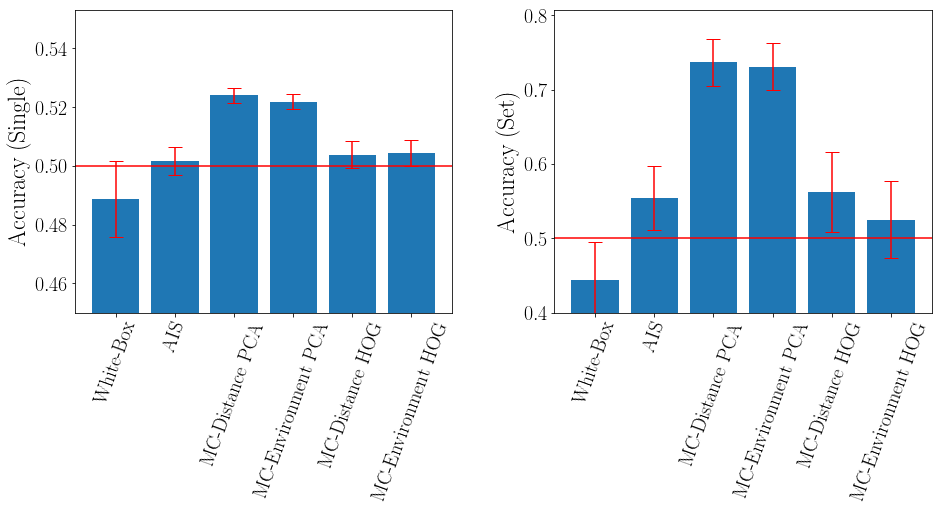

In [19]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(121)

names = ['White-Box', 'AIS'
         #,'MC-Distance PCA', 'MC-Environment PCA', 'MC-Distance HOG', 'MC-Environment HOG'
        ,'MC-Distance PCA', 'MC-Environment PCA', 'MC-Distance HOG', 'MC-Environment HOG']
N = len(names)
ind = np.arange(N)

y = [white_box.white_box_50.mean(), 
                               ais.ais_50.mean(), 
                               #pca_opt_perc.mc_attack_log_50.mean(),
                               #pca_opt_perc.mc_attack_eps_50.mean(),
                               #hog_opt_perc.mc_attack_log_50.mean(),
                               #hog_opt_perc.mc_attack_eps_50.mean(),
                               pca_cat_opt_perc.mc_attack_log_50.mean(),
                               pca_cat_opt_perc.mc_attack_eps_50.mean(),
                               hog_cat_opt_perc.mc_attack_log_50.mean(),
                               hog_cat_opt_perc.mc_attack_eps_50.mean()]

rects1 = ax.bar(ind,  y)

e = [calc_error(white_box.white_box_50), 
                               calc_error(ais.ais_50), 
                               #calc_error(pca_opt_perc.mc_attack_log_50), 
                               #calc_error(pca_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_opt_perc.mc_attack_log_50), 
                               #calc_error(hog_opt_perc.mc_attack_eps_50),
                               calc_error(pca_cat_opt_perc.mc_attack_log_50), 
                               calc_error(pca_cat_opt_perc.mc_attack_eps_50), 
                               calc_error(hog_cat_opt_perc.mc_attack_log_50), 
                               calc_error(hog_cat_opt_perc.mc_attack_eps_50)]

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)


plt.ylim(ymin=0.45)
plt.axhline(y=0.5, color='r', linestyle='-')

plt.ylabel('Accuracy (Single)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)

ax = plt.subplot(122)#, sharey=ax)

ind = np.arange(N)

y = [white_box.set_accuracy_wb.mean(), 
                               ais.set_accuracy_ais.mean(), 
                               #pca_opt_perc.set_accuracy_mc_log.mean(),
                               #pca_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_opt_perc.set_accuracy_mc_log.mean(),
                               #hog_opt_perc.set_accuracy_mc_ones.mean(),
                               pca_cat_opt_perc.set_accuracy_mc_log.mean(),
                               pca_cat_opt_perc.set_accuracy_mc_ones.mean(),
                               hog_cat_opt_perc.set_accuracy_mc_log.mean(),
                               hog_cat_opt_perc.set_accuracy_mc_ones.mean()]
rects1 = ax.bar(ind, y)

e = [calc_error(white_box.set_accuracy_wb), 
                               calc_error(ais.set_accuracy_ais), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_log), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_log), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_ones),
                               calc_error(pca_cat_opt_perc.set_accuracy_mc_log), 
                               calc_error(pca_cat_opt_perc.set_accuracy_mc_ones), 
                               calc_error(hog_cat_opt_perc.set_accuracy_mc_log), 
                               calc_error(hog_cat_opt_perc.set_accuracy_mc_ones)]

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)

plt.ylabel('Accuracy (Set)', fontsize='large')

plt.ylim(ymin=0.4)
plt.axhline(y=0.5, color='r', linestyle='-')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')
ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('GAN_MNIST_Mem_Inf_10_Perc.pgf', bbox_inches="tight")
    
plt.show()

In [20]:
print(len(hog_opt_perc))
print(len(hog_cat_opt_perc))

91
80


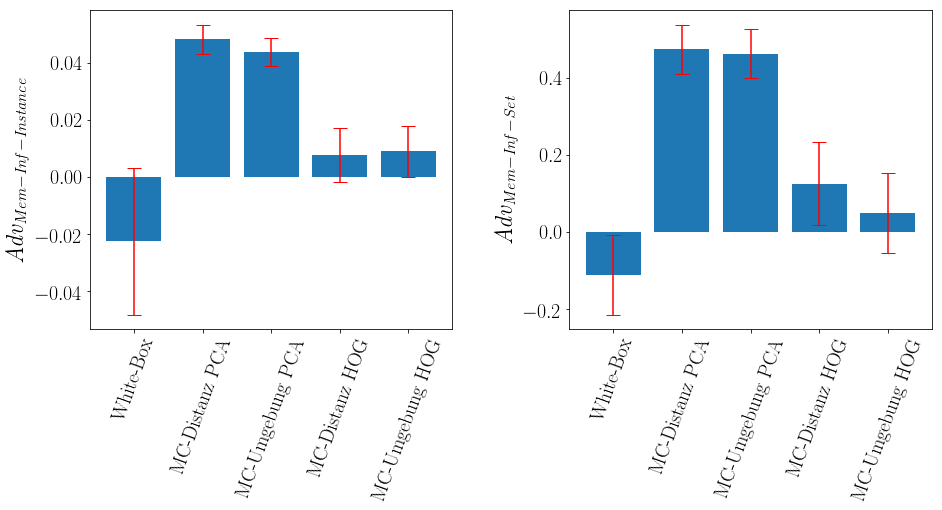

In [21]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(121)

names = ['White-Box', 'MC-Distanz PCA', 'MC-Umgebung PCA', 'MC-Distanz HOG', 'MC-Umgebung HOG']
N = len(names)
ind = np.arange(N)

y = [white_box.mem_inf_adv_wb.mean(), 
                               #ais.mem_inf_adv_ais.mean(), 
                               pca_cat_opt_perc.mem_inf_adv_mc_log.mean(),
                               pca_cat_opt_perc.mem_inf_adv_mc_ones.mean(),
                               hog_cat_opt_perc.mem_inf_adv_mc_log.mean(),
                               hog_cat_opt_perc.mem_inf_adv_mc_ones.mean()]

rects1 = ax.bar(ind,  y)

e = [calc_error(white_box.mem_inf_adv_wb), 
                               #calc_error(ais.mem_inf_adv_ais), 
                               calc_error(pca_cat_opt_perc.mem_inf_adv_mc_log), 
                               calc_error(pca_cat_opt_perc.mem_inf_adv_mc_ones),
                               calc_error(hog_cat_opt_perc.mem_inf_adv_mc_log),
                               calc_error(hog_cat_opt_perc.mem_inf_adv_mc_ones)]
plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)

plt.ylabel('$\\mathit{Adv_{Mem-Inf-Instance}}$', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)

ax = plt.subplot(122)#, sharey=ax)

ind = np.arange(N)

y = [white_box.set_mem_inf_adv_wb.mean(), 
                               #ais.set_mem_inf_adv_ais.mean(), 
                               pca_cat_opt_perc.set_mem_inf_adv_mc_log.mean(),
                               pca_cat_opt_perc.set_mem_inf_adv_mc_ones.mean(),
                               hog_cat_opt_perc.set_mem_inf_adv_mc_log.mean(),
                               hog_cat_opt_perc.set_mem_inf_adv_mc_ones.mean()]

rects1 = ax.bar(ind, y)

e = [calc_error(white_box.set_mem_inf_adv_wb), 
                               #calc_error(ais.mem_inf_adv_ais), 
                               calc_error(pca_cat_opt_perc.set_mem_inf_adv_mc_log), 
                               calc_error(pca_cat_opt_perc.set_mem_inf_adv_mc_ones),
                               calc_error(hog_cat_opt_perc.set_mem_inf_adv_mc_log),
                               calc_error(hog_cat_opt_perc.set_mem_inf_adv_mc_ones)]

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)

plt.ylabel('$\\mathit{Adv_{Mem-Inf-Set}}$', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')
ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('GAN_MNIST_Mem_Inf_10_Perc.pgf', bbox_inches="tight")
    
plt.show()